In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd

# Chemins vers les fichiers sur Google Drive
base_path = '/content/drive/MyDrive/Donnees/'

def load_data(file_name):
    return pd.read_csv(base_path + file_name)

# Chargement des données
election = load_data("Election_Securite.csv")
emploi = load_data("Emploi.csv")
education = load_data("Education.csv")
sante = load_data("Sante.csv")
pouvoir_achat = load_data("Pouvoir_Achat.csv")

# Préparation des données d'élection
election = election.loc[:, ['% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot',
                            'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', "Nom", "code"]]
election.rename(columns={'code': 'code departement'}, inplace=True)
election['code departement'] = election['code departement'].astype(str)

# Fusion des bases de données
def merge_data(dfs, on='code departement'):
    from functools import reduce
    return reduce(lambda left, right: pd.merge(left, right, on=on), dfs)

database = merge_data([election, education, sante])
database.dropna(inplace=True)

# Séparation des données en caractéristiques (X) et cible (y)
y = database.pop("Nom")
X = database

In [26]:
# Fusion des bases de données
def merge_data(dfs, on='code departement'):
    from functools import reduce
    merged_data = reduce(lambda left, right: pd.merge(left, right, on=on), dfs)
    print("Nombre de lignes et de colonnes après fusion des données :", merged_data.shape)
    print("Premières lignes du DataFrame fusionné :\n", merged_data.head())  # Affiche les premières lignes
    return merged_data

database = merge_data([election, education, sante])


Nombre de lignes et de colonnes après fusion des données : (5797932, 22)
Premières lignes du DataFrame fusionné :
    % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  % Blancs/Vot  Nuls  \
0      10.34     1058      89.66      17          1.44          1.61     6   
1      10.34     1058      89.66      17          1.44          1.61     6   
2      10.34     1058      89.66      17          1.44          1.61     6   
3      10.34     1058      89.66      17          1.44          1.61     6   
4      10.34     1058      89.66      17          1.44          1.61     6   

   % Nuls/Ins  % Nuls/Vot  Exprimés  ...      Nom  code departement EC_MAT  \
0        0.51        0.57      1035  ...  ARTHAUD                41      5   
1        0.51        0.57      1035  ...  ARTHAUD                41      5   
2        0.51        0.57      1035  ...  ARTHAUD                41      5   
3        0.51        0.57      1035  ...  ARTHAUD                41      5   
4        0.51        0.57 

In [6]:
# Sauvegarde du DataFrame fusionné en CSV
database.to_csv('/content/database_fusion.csv', index=False)

# Téléchargement du fichier CSV
from google.colab import files
files.download('/content/database_fusion.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#convertir les étiquettes catégorielles en valeurs numériques
# Encodage de la cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#pour ameliorer la convergence et le modèle
# Normalisation des données
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [28]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Modèle de Régression Logistique
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Évaluation du modèle
print("Accuracy Logistic Regression: {:.2f}%".format(accuracy_score(y_test, y_pred_logreg) * 100))
print(classification_report(y_test, y_pred_logreg))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression: 90.37%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92    125815
           1       0.92      0.96      0.94    372029
           2       0.94      0.97      0.96    267402
           3       0.91      0.61      0.73     41762
           4       0.95      0.96      0.96     21328
           5       0.81      0.69      0.75     61466
           6       1.00      0.99      0.99     27263
           7       0.00      0.00      0.00      4775
           8       0.83      0.88      0.86     70245
           9       0.83      0.86      0.84    160536
          10       0.00      0.00      0.00      6966

    accuracy                           0.90   1159587
   macro avg       0.74      0.71      0.72   1159587
weighted avg       0.89      0.90      0.90   1159587



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Évaluation du modèle
print("Accuracy Random Forest: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print(classification_report(y_test, y_pred_rf))


Accuracy Random Forest: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125815
           1       1.00      1.00      1.00    372029
           2       1.00      1.00      1.00    267402
           3       1.00      1.00      1.00     41762
           4       1.00      1.00      1.00     21328
           5       1.00      1.00      1.00     61466
           6       1.00      1.00      1.00     27263
           7       1.00      1.00      1.00      4775
           8       1.00      1.00      1.00     70245
           9       1.00      1.00      1.00    160536
          10       1.00      1.00      1.00      6966

    accuracy                           1.00   1159587
   macro avg       1.00      1.00      1.00   1159587
weighted avg       1.00      1.00      1.00   1159587



Epoch 1/20
36238/36238 [==============================] - 129s 3ms/step - loss: 0.0389 - accuracy: 0.9895 - val_loss: 3.0419e-04 - val_accuracy: 1.0000
Epoch 2/20
36238/36238 [==============================] - 128s 4ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 9.3566e-05 - val_accuracy: 1.0000
Epoch 3/20
36238/36238 [==============================] - 130s 4ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 1.0788e-04 - val_accuracy: 1.0000
Epoch 4/20
36238/36238 [==============================] - 130s 4ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 1.0153e-04 - val_accuracy: 1.0000
Epoch 5/20
36238/36238 [==============================] - 129s 4ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 1.5171e-05 - val_accuracy: 1.0000
Epoch 6/20
36238/36238 [==============================] - 136s 4ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 4.5468e-05 - val_accuracy: 1.0000
Epoch 7/20
36238/36238 [==============================] - 129s 4ms/step - loss: 0.0041 -

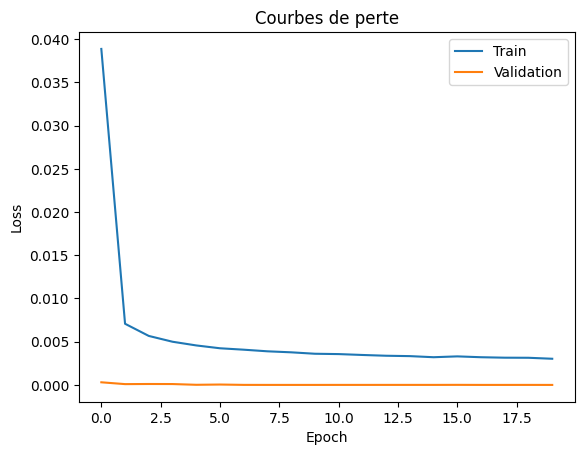

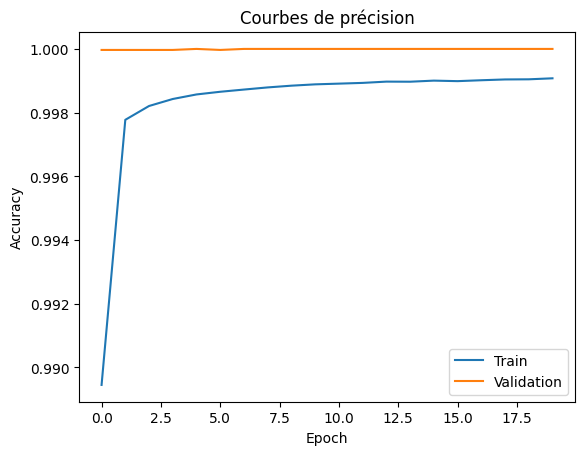

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Conversion des étiquettes en vecteurs binaires catégoriques
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Création du modèle MLP
model = Sequential()
model.add(Dense(100, activation='tanh', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=128, validation_data=(X_test, y_test_categorical))

# Évaluation du modèle
loss, accuracy_mlp = model.evaluate(X_test, y_test_categorical)
print("Accuracy MLP: {:.2f}%".format(accuracy_mlp * 100))

# Visualisation des courbes de perte et de précision
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbes de perte')
plt.show()

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbes de précision')
plt.show()


In [ ]:
# Filtrer les données pour ne garder que celles du département 95
database_95 = database[database['code departement'] == '95']

# Sauvegarder le DataFrame filtré en CSV
database_95.to_csv('/content/database_95.csv', index=False)

# Télécharger le fichier CSV
from google.colab import files
files.download('/content/database_95.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import pandas as pd
from google.colab import files

# Charger le fichier Excel
file_path_95 = "/content/drive/MyDrive/Donnees/Presidentielle_2017_Resultats_Tour_1.xls"
df = pd.read_excel(file_path_95)

# Vérifier les valeurs uniques dans la colonne "Code du département"
print("Valeurs uniques dans la colonne 'Code du département' :")
print(df['Code du département'].unique())

# S'assurer que la colonne "Code du département" est traitée comme des chaînes de caractères
df['Code du département'] = df['Code du département'].astype(str)

# Filtrer sur le département 95
df_filtered = df[df['Code du département'] == '95']

# Vérifier si le filtrage a fonctionné
print("\nAperçu des données filtrées :")
print(df_filtered)

# Sauvegarder en CSV seulement si les données filtrées ne sont pas vides
if not df_filtered.empty:
    csv_file_path = 'departement_95.csv'
    df_filtered.to_csv(csv_file_path, index=False)

    # Télécharger le fichier CSV
    files.download(csv_file_path)
else:
    print("Aucune donnée trouvée pour le département 95.")


Valeurs uniques dans la colonne 'Code du département' :
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 '2A' '2B' 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 'ZA'
 'ZB' 'ZC' 'ZD' 'ZM' 'ZN' 'ZP' 'ZS' 'ZW' 'ZX']

Aperçu des données filtrées :
   Code du département Libellé du département  Inscrits  Abstentions  \
95                  95             Val-d'Oise    730497       167560   

    % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  % Blancs/Vot  ...  \
95      22.94   562937      77.06   10090          1.38          1.79  ...   

    Prénom.9  Voix.9  % Voix/Ins.9  % Voix/Exp.9  Sexe.10     Nom.10  \
95  Nathalie    2762          0.38           0.5        M  CHEMINADE   

   Prénom.10 Voix.10 % Voix/Ins.10  % Voix/Exp.10  
95   Jacques     979          0.13           0.18  

[1 rows x 82 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Charger les données du département 95
df_95 = pd.read_csv("/content/drive/MyDrive/Donnees/departement_95.csv")

# Supprimer les colonnes non nécessaires pour la prédiction, incluant les colonnes non numériques
columns_to_drop = ["Nom", "Libellé du département"]
X_95 = df_95.drop(columns=columns_to_drop)

# Assurez-vous que toutes les colonnes restantes sont numériques
X_95 = X_95.apply(pd.to_numeric, errors='coerce')

# Remplacer les valeurs NaN résultantes par 0 (ou une autre valeur appropriée)
X_95 = X_95.fillna(0)

# Normalisation des données
X_normalized_95 = scaler.transform(X_95)

# Faire les prédictions avec le modèle sur les données normalisées du département 95
predictions = model.predict(X_normalized_95)

# Trouver l'indice du candidat gagnant pour chaque ligne de prédictions
winner_indices = np.argmax(predictions, axis=1)

# Calculer le candidat avec le plus grand nombre de votes prédits
winner_counter = Counter(winner_indices)
overall_winner_index = winner_counter.most_common(1)[0][0]


# on peut alors obtenir le nom du candidat gagnant
overall_winner_name = df_95.loc[overall_winner_index, 'Nom']

print("Le candidat gagnant dans le département 95 est :", overall_winner_name)


1/1 [==============================] - 0s 40ms/step
Le candidat gagnant dans le département 95 est : MACRON
